In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,LSTM

In [ ]:
#creating the dataset
N=1000
Tp=800
t=np.arange(0,N)
#formula to generate time series
x=np.sin(0.02*t)+2*np.random.rand(N)
df=pd.DataFrame(x)
df.head()

,0
0,0.448627
1,1.260057
2,1.360726
3,0.210258
4,0.511291


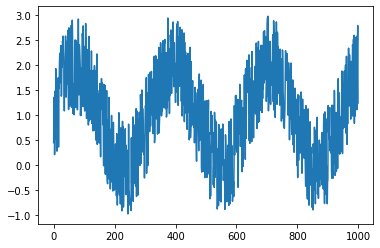

In [ ]:
plt.plot(df)

In [ ]:
#splitting
values=df.values
train,test=values[:Tp,:],values[Tp:,:]

In [ ]:
train.shape

(811,)

In [ ]:
#RNN requires step size , i.e number of elements as input sequence
#for step 1
# i/p is 1.     o/p is 2
#for step 3
#i/p is 1,2,3   o/p is 4

In [ ]:
stepsize=7
#add step elements to train and test
test=np.append(test,np.repeat(test[-1],stepsize))
train=np.append(train,np.repeat(train[-1],stepsize))

In [ ]:
train

array([ 4.48626554e-01,  1.26005689e+00,  1.36072612e+00,  2.10258198e-01,
        5.11291045e-01,  1.48099549e+00,  5.27672539e-01,  1.92553962e+00,
        1.28436200e+00,  1.34324396e+00,  7.38094006e-01,  2.78696820e-01,
        4.16348215e-01,  1.04575460e+00,  1.55019205e+00,  1.74347562e+00,
        3.61152869e-01,  1.59578545e+00,  1.53795016e+00,  2.03927271e+00,
        2.23185300e+00,  1.64440455e+00,  1.71075661e+00,  2.33737487e+00,
        2.38737288e+00,  1.37676032e+00,  1.40529071e+00,  2.28268217e+00,
        1.94946817e+00,  2.47648696e+00,  2.42906236e+00,  2.57625393e+00,
        2.31587569e+00,  2.16266035e+00,  1.73930164e+00,  1.08243783e+00,
        1.85897992e+00,  2.05915179e+00,  1.91280719e+00,  2.57704207e+00,
        2.12701413e+00,  1.35783429e+00,  1.67580842e+00,  1.65313226e+00,
        2.47398811e+00,  1.61715423e+00,  1.81250181e+00,  2.69297362e+00,
        1.54008129e+00,  1.11158248e+00,  2.74054648e+00,  2.46185556e+00,
        1.39964304e+00,  

In [ ]:
#convert dataset into matrix
def convertToMatrix(data,step):
  X,Y=[],[]
  for i in range(len(data)-step):
    d=i+step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X),np.array(Y)

trainX,trainY=convertToMatrix(train,stepsize)
testX,testY=convertToMatrix(test,stepsize)

In [ ]:
trainX

array([[0.44862655, 1.26005689, 1.36072612, ..., 0.51129105, 1.48099549,
        0.52767254],
       [1.26005689, 1.36072612, 0.2102582 , ..., 1.48099549, 0.52767254,
        1.92553962],
       [1.36072612, 0.2102582 , 0.51129105, ..., 0.52767254, 1.92553962,
        1.284362  ],
       ...,
       [1.31751389, 1.31751389, 1.31751389, ..., 1.31751389, 1.31751389,
        1.31751389],
       [1.31751389, 1.31751389, 1.31751389, ..., 1.31751389, 1.31751389,
        1.31751389],
       [1.31751389, 1.31751389, 1.31751389, ..., 1.31751389, 1.31751389,
        1.31751389]])

In [ ]:
#reshape testX and trainX to fit keras model as RNN requires 3-D input

In [ ]:
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [ ]:
trainX.shape

(804, 1, 7)

In [ ]:
#Building the model

model=Sequential()
model.add(LSTM(32, input_shape=(1,7),activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                5120      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fitting
model.fit(trainX,trainY,epochs=100,batch_size=16,verbose=2)

Epoch 1/100
51/51 - 2s - loss: 0.8535 - 2s/epoch - 34ms/step
Epoch 2/100
51/51 - 0s - loss: 0.4001 - 97ms/epoch - 2ms/step
Epoch 3/100
51/51 - 0s - loss: 0.3965 - 95ms/epoch - 2ms/step
Epoch 4/100
51/51 - 0s - loss: 0.3897 - 107ms/epoch - 2ms/step
Epoch 5/100
51/51 - 0s - loss: 0.3842 - 132ms/epoch - 3ms/step
Epoch 6/100
51/51 - 0s - loss: 0.3836 - 100ms/epoch - 2ms/step
Epoch 7/100
51/51 - 0s - loss: 0.3786 - 104ms/epoch - 2ms/step
Epoch 8/100
51/51 - 0s - loss: 0.3795 - 101ms/epoch - 2ms/step
Epoch 9/100
51/51 - 0s - loss: 0.3743 - 119ms/epoch - 2ms/step
Epoch 10/100
51/51 - 0s - loss: 0.3748 - 133ms/epoch - 3ms/step
Epoch 11/100
51/51 - 0s - loss: 0.3740 - 99ms/epoch - 2ms/step
Epoch 12/100
51/51 - 0s - loss: 0.3737 - 103ms/epoch - 2ms/step
Epoch 13/100
51/51 - 0s - loss: 0.3731 - 102ms/epoch - 2ms/step
Epoch 14/100
51/51 - 0s - loss: 0.3715 - 105ms/epoch - 2ms/step
Epoch 15/100
51/51 - 0s - loss: 0.3706 - 113ms/epoch - 2ms/step
Epoch 16/100
51/51 - 0s - loss: 0.3697 - 123ms/epoch -

In [ ]:
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

7/7 [==============================] - 0s 2ms/step


In [ ]:
trainPredict

array([[ 8.76458466e-01],
       [ 1.07727444e+00],
       [ 9.88555431e-01],
       [ 1.16646183e+00],
       [ 9.53999639e-01],
       [ 8.86922240e-01],
       [ 7.44305551e-01],
       [ 1.11033452e+00],
       [ 1.01499414e+00],
       [ 1.08757865e+00],
       [ 9.53247547e-01],
       [ 1.04560304e+00],
       [ 1.09872365e+00],
       [ 1.39820361e+00],
       [ 1.47122812e+00],
       [ 1.42877448e+00],
       [ 1.50720489e+00],
       [ 1.65022695e+00],
       [ 1.66494238e+00],
       [ 1.65939248e+00],
       [ 1.74794114e+00],
       [ 1.68101013e+00],
       [ 1.65248930e+00],
       [ 1.84371328e+00],
       [ 1.73089671e+00],
       [ 1.66327536e+00],
       [ 1.82812202e+00],
       [ 1.86890328e+00],
       [ 1.85791528e+00],
       [ 1.75144625e+00],
       [ 1.90544450e+00],
       [ 1.79048741e+00],
       [ 1.71259511e+00],
       [ 1.75286388e+00],
       [ 1.57368982e+00],
       [ 1.62712872e+00],
       [ 1.79421818e+00],
       [ 1.67105162e+00],
       [ 1.7

In [ ]:
predicted=np.concatenate((trainPredict,testPredict),axis=0)

In [ ]:
#check the loss
trainScore=model.evaluate(trainX,trainY,verbose=0)
print(trainScore)

0.35396307706832886


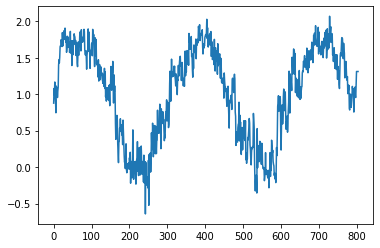

In [ ]:
plt.plot(trainPredict)

In [ ]:
predicted.shape

(1008, 1)